In [20]:
import numpy as np
import pandas as pd
import re
import os
import matplotlib
import matplotlib.pyplot as plt
import json

In [23]:
meshfile = open('square.txt','r'); #Read .txt file
trash = 30; 
read_lines = meshfile.readlines()[trash:] #Read lines function /skips first 30 lines of .txt file
matches = []
node_tags = []
el_tags = []
x_extraction = []; y_extraction = [];
node1 = []; node2 = []; node3 = []; node4 = [];
connect1 = []; connect2 = []; connect3 = []; connect4 = [];
#------------------------------------------------DATA EXTRACTION----------------------------------------------------------------
for line in read_lines: #For cycle to go over all lines in .txt
    #result.append(read_lines)
    if line.__contains__('GRID'): #Condition to read lines 'GRID (nodal points and its coordinates)'
        n_data = re.match("GRID\s+(\d+)\s{8}(.{8})(.{8})", line) #Matches all nodal data in ordered columns
        node_tags.append(int(n_data.group(1))) #Saves the numbers to 'node_tags' variable to store them globally
              
        col2 = n_data.group(2)
        col3 = n_data.group(3)
        
        if col2[4].__contains__('-'):
            col2 = col2[:4] + 'e-' + col2[5:]
            
        elif col2[5].__contains__('-'):
            col2 = col2[:5] + 'e-' + col2[6:]
        
        if col3[4].__contains__('-'):
            col3 = col3[:4] + 'e-' + col3[5:]
            
        elif col3[5].__contains__('-'):
            col3 = col3[:5] + 'e-' + col3[6:] 
            
        x_extraction.append(float(col2))      
        y_extraction.append(float(col3)) 

    try:
            el_data = re.match('CQUAD4\s+(\d+)\s+\d\s+(\d+)\s+(\d+)\s+(\d+)\s+(\d+)', line) 
            el_tags.append(int(el_data.group(1)))
            node1.append(int(el_data.group(2)))
            node2.append(int(el_data.group(3)))
            node3.append(int(el_data.group(4)))
            node4.append(int(el_data.group(5)))
            
    except AttributeError:
        pass;
 
 #----------------------------------------------DATA CONVERSION-----------------------------------------------------------------        

nnodes = len(node_tags)
nelements = len(el_tags)

for i in range(nelements):
    connect1.append(node_tags.index(node1[i]))
    connect2.append(node_tags.index(node2[i]))
    connect3.append(node_tags.index(node3[i]))
    connect4.append(node_tags.index(node4[i]))

node_tags = np.array(list(range(0, nnodes)))

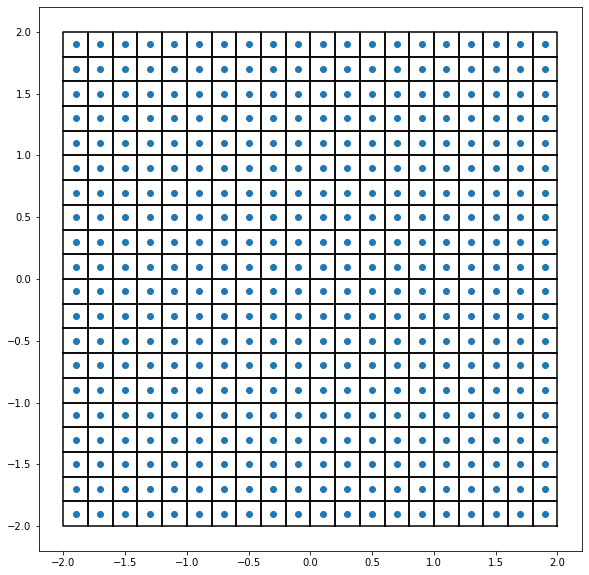

In [42]:
x1 = []; x2 = []; x3 = []; x4 = [];
y1 = []; y2 = []; y3 = []; y4 = [];

for i in range(nelements):

     x1.append(x_extraction[connect1[i]])  
     x2.append(x_extraction[connect2[i]]) 
     x3.append(x_extraction[connect3[i]]) 
     x4.append(x_extraction[connect4[i]]) 

     y1.append(y_extraction[connect1[i]])  
     y2.append(y_extraction[connect2[i]]) 
     y3.append(y_extraction[connect3[i]]) 
     y4.append(y_extraction[connect4[i]])

xxx = [x1,x2,x3,x4,x1]
yyy = [y1,y2,y3,y4,y1]

#------------------------------------------------------------------CENTRAL NODES---------------------
dx_coord = []; dy_coord = [];

for i in range(nelements):
    dx_coord.append(((x_extraction[node_tags[connect1[i]]])-(x_extraction[node_tags[connect4[i]]]))/2+(x_extraction[node_tags[connect4[i]]]))
    dy_coord.append(((y_extraction[node_tags[connect2[i]]])-(y_extraction[node_tags[connect1[i]]]))/2+(y_extraction[node_tags[connect1[i]]]))

#fig = plt.figure
#plt.rcParams["figure.figsize"] = (5,5)


fig = plt.figure
#plt.rcParams["figure.figsize"] = (35,20)
plt.rcParams["figure.figsize"] = (10,10)
plt.scatter(dx_coord,dy_coord)
plt.plot(xxx,yyy, color = 'black')
plt.axis('scaled')
plt.draw() 

#plt.savefig('figure_name.png', dpi = 500)



In [ ]:
Lx=0.5; Ly=0.5; n = 7; m = 7; nn=n*m; # Geom descretization/mesh
Ta=100.1; Tb=100.2; Tc=100.3; Td=100.4; # BCs
k=0.5;  # Properties
 
dx = Lx/n;  dy = Ly/m;   
x = np.linspace(dx/2,Lx-dx/2,n); y = np.linspace(dy/2,Ly-dy/2,m); [X, Y]=np.meshgrid(x,y); 

A=np.zeros([nn,nn]); b=np.zeros([nn]); d2=np.zeros([m,n])

dz=1;  G=k; q=100000; 

for j in range(m): 
     for i in range(n): 
        P = j*n+i; W = P-1; E = P+1; N=P+n; S=P-n; 
        Aw = dy*dz; Ae=Aw; An=dx*dz; As = An; Su=0; Sp=0; Sua=0*q*Aw*dx; Sub=0*q*Ae*dx; Suc=0*q*As*dy; Sud=0*q*An*dy; 
        aW = G*Aw/dx; aE = G*Ae/dx; aN = G*An/dy; aS = G*As/dy;
        if(i>0): 
            A[P,W]=-aW; 
        else: 
            aW=0; Sp=Sp-2*G*Aw/dx; Su=Su+Sua + 2*G*Aw/dx*Ta; #aW=0; Sp=Sp-2*G*Aw/dx; Su=Su + 2*G*Aw/dx*Ta;
        
        if(i<n-1): 
            A[P,E]=-aE; 
        else:
            aE=0; Sp=Sp-2*G*Ae/dx; Su=Su+Sub + 2*G*Ae/dx*Tb;
        if(j>0): 
            A[P,S]=-aS; 
        else:
            aS=0; Sp=Sp-2*G*As/dy; Su=Su+Suc + 2*G*As/dy*Tc;
        if(j<m-1): 
            A[P,N]=-aN; 
        else:
            aN=0; Sp=Sp-2*G*An/dy; Su=Su+Sud + 2*G*An/dy*Td;
        
        aP = aW + aE + aS + aN - Sp; 
        A[P,P] = aP; 
        b[P]=Su; 

d=np.linalg.solve(A,b);  

for j in range(m):
    for i in range(n):
        IN=j*n+i; d2[j,i]=d[IN];

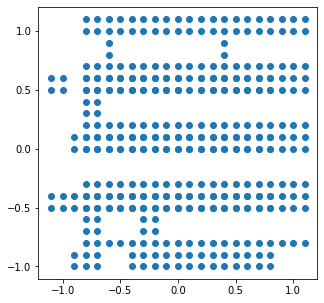